In [3]:
"""
Created on Fri May 3 14:28:18 2019

#Mst. Mahfuja Akter
#Maryam Assaedi
#Mahpara Hyder Chowdhury
"""
#a
import pandas as pd
df = pd.read_excel("breast-cancer-wisconsin.xlsx")

data = pd.isna(df)
df[data] = 0
print(df)

        code  thickness  uniCelS  uniCelShape  marAdh  epiCelSize  bareNuc  \
0    1000025          5        1            1       1           2      1.0   
1    1002945          5        4            4       5           7     10.0   
2    1015425          3        1            1       1           2      2.0   
3    1016277          6        8            8       1           3      4.0   
4    1017023          4        1            1       3           2      1.0   
5    1017122          8       10           10       8           7     10.0   
6    1018099          1        1            1       1           2     10.0   
7    1018561          2        1            2       1           2      1.0   
8    1033078          2        1            1       1           2      1.0   
9    1033078          4        2            1       1           2      1.0   
10   1035283          1        1            1       1           1      1.0   
11   1036172          2        1            1       1           

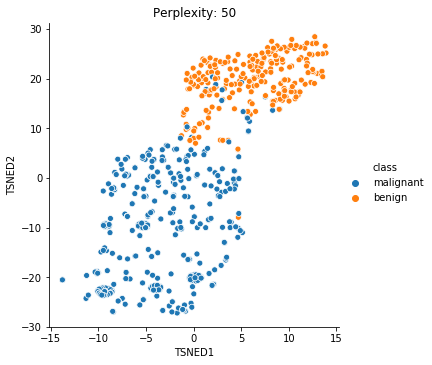

In [9]:
from sklearn.manifold import TSNE
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
a = np.random.randint(0, 698)
X = df.iloc[:, 1:10].values
#random_state=a,
tsne = TSNE(n_components=2,perplexity=50).fit_transform(X)

newTsneDf = pd.DataFrame(data = tsne, columns = ['TSNED1','TSNED2'])
df['class'].replace([2,4],['malignant','benign'], inplace = True)
tsnedf = pd.concat([newTsneDf, df[['class']]], axis = 1)

ax = sns.relplot(x="TSNED1", y = "TSNED2", hue="class", data = tsnedf)
plt.title("Perplexity: 50")
plt.show(ax)

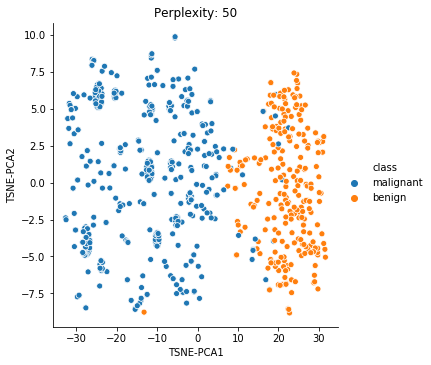

In [15]:
tsnepca = TSNE(n_components=2,init= 'pca',perplexity=50).fit_transform(X)

newTsnepcaDf = pd.DataFrame(data = tsnepca, columns = ['TSNE-PCA1','TSNE-PCA2'])
newTsnepcaDf = pd.concat([newTsnepcaDf, df[['class']]], axis = 1)

ax = sns.relplot(x="TSNE-PCA1", y = "TSNE-PCA2", hue="class", data = newTsnepcaDf)
plt.title("Perplexity: 50")
plt.show(ax)